In [1]:
import os
from src.dataset import Dataset
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/

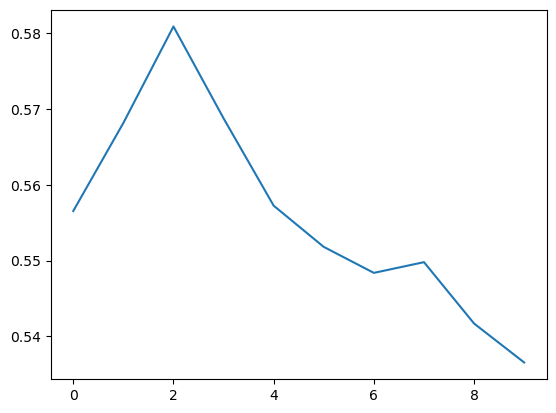

In [4]:
from src.reactions.da.da_dataset import XtbSimulatedDADataset

dataset = XtbSimulatedDADataset(
    csv_file_path="da/xtb_simulated_da_no_solvent.csv"
)

scores = []
for marg in np.linspace(0, 10, 10):

    df = dataset.load(
        aggregation_mode='avg',
        margin=marg / 627.5
    )

    targets, preds = [], []
    for idx in df['reaction_idx'].unique():
        target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['labels']
        pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']

        if len(pred) > 0 and len(target) > 0:
            targets.append(target.values[0])
            preds.append(pred.values[0])

    scores.append(roc_auc_score(targets, preds))
plt.plot(np.arange(len(scores)), scores)

In [5]:
scores

[0.5565292815696596,
 0.5681417120296703,
 0.5808608003828438,
 0.568747382903631,
 0.5572321588801818,
 0.5517960758509302,
 0.5483714183166837,
 0.5497846503559252,
 0.5416940838667226,
 0.5365570975653526]

/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rhjvanworkum/anaconda3/envs/ts/lib/python3.8/site-packages/

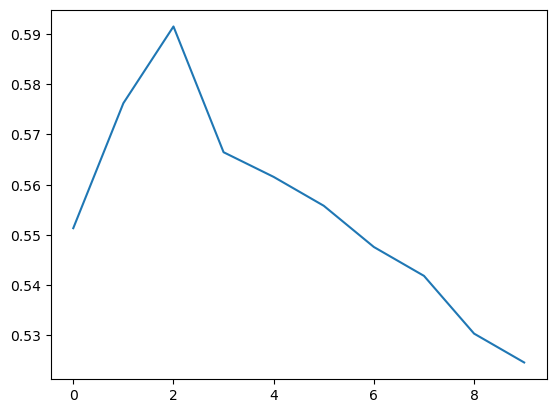

In [9]:
from src.reactions.da.da_dataset import XtbSimulatedDADataset

dataset = XtbSimulatedDADataset(
    csv_file_path="da/xtb_simulated_da_solvent.csv"
)

scores = []
for marg in np.linspace(0, 10, 10):

    df = dataset.load(
        aggregation_mode='avg',
        margin=marg / 627.5
    )

    targets, preds = [], []
    for idx in df['reaction_idx'].unique():
        target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
        pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']

        if len(pred) > 0 and len(target) > 0:
            targets.append(target.values[0])
            preds.append(pred.values[0])

    scores.append(roc_auc_score(targets, preds))
plt.plot(np.arange(len(scores)), scores)

In [10]:
scores

[0.5513460375075621,
 0.5762250453720508,
 0.5915003024803387,
 0.5664700544464609,
 0.5615547489413188,
 0.5558076225045373,
 0.5476028433151845,
 0.5418557168784028,
 0.5303614640048397,
 0.5246143375680581]

In [3]:
import os
from src.dataset import Dataset
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

from src.reactions.da.da_dataset import FukuiSimulatedDADataset


dataset = FukuiSimulatedDADataset(
    csv_file_path="da/fukui_simulated_da_solvent.csv"
)
df = dataset.load()

targets, preds = [], []
for idx in df['reaction_idx'].unique():
    target = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 0)]['label']
    pred = df[(df['reaction_idx'] == idx) & (df['simulation_idx'] == 1)]['label']

    if len(pred) > 0 and len(target) > 0:
        targets.append(target.values[0])
        preds.append(pred.values[0])

roc_auc_score(targets, preds)

/home/rhjvanworkum/virtual_reactions/src/reactions/da/da_dataset.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virtual_df['label'] = labels


0    0.0
1    1.0
Name: label, dtype: float64 714    1.0
715    0.0
Name: label, dtype: float64
2    0.0
3    1.0
Name: label, dtype: float64 716    1.0
717    0.0
Name: label, dtype: float64
4    1.0
5    0.0
Name: label, dtype: float64 718    0.0
719    1.0
Name: label, dtype: float64
6    0.0
7    0.0
8    1.0
Name: label, dtype: float64 720    0.0
721    1.0
722    0.0
Name: label, dtype: float64
9     0.0
10    1.0
Name: label, dtype: float64 723    0.0
724    1.0
Name: label, dtype: float64
11    0.0
12    1.0
Name: label, dtype: float64 725    0.0
726    1.0
Name: label, dtype: float64
13    0.0
14    1.0
Name: label, dtype: float64 727    0.0
728    1.0
Name: label, dtype: float64
15    0.0
16    1.0
Name: label, dtype: float64 729    1.0
730    0.0
Name: label, dtype: float64
17    0.0
18    1.0
Name: label, dtype: float64 731    1.0
732    0.0
Name: label, dtype: float64
19    1.0
20    0.0
21    0.0
22    0.0
Name: label, dtype: float64 733    0.0
734    0.0
735    1.0
736  

410    0.0
411    1.0
Name: label, dtype: float64 1124    1.0
1125    0.0
Name: label, dtype: float64
412    0.0
413    1.0
Name: label, dtype: float64 1126    0.0
1127    1.0
Name: label, dtype: float64
414    0.0
415    1.0
Name: label, dtype: float64 1128    0.0
1129    1.0
Name: label, dtype: float64
416    1.0
417    0.0
Name: label, dtype: float64 1130    1.0
1131    0.0
Name: label, dtype: float64
418    0.0
419    1.0
Name: label, dtype: float64 1132    1.0
1133    0.0
Name: label, dtype: float64
420    1.0
421    0.0
Name: label, dtype: float64 1134    1.0
1135    1.0
Name: label, dtype: float64
422    1.0
423    0.0
Name: label, dtype: float64 1136    1.0
1137    0.0
Name: label, dtype: float64
424    1.0
425    0.0
Name: label, dtype: float64 1138    1.0
1139    0.0
Name: label, dtype: float64
426    0.0
427    1.0
Name: label, dtype: float64 1140    1.0
1141    0.0
Name: label, dtype: float64
428    0.0
429    1.0
Name: label, dtype: float64 1142    0.0
1143    1.0
Name: la

0.4950846944948578